In [11]:
import torch
import torch.nn.functional as F

In [4]:
names =[]
with open("data/dinos.txt", "r") as file:
    names = file.readlines()
names = [name.strip().lower() for name in names]
chars = sorted(set(['.']+[c for name in names for c in name]))
print(chars)
char_to_ix = {c:i for i, c in enumerate(chars)}
ix_to_char = {i:c for i, c in enumerate(chars)}

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
def chartoi(c):
    return char_to_ix[c]
    
def itochar(i):
    return ix_to_char[i]

In [23]:
def create_dataset(data_names, context_length=3):
    X = []
    Y = []
    for name in data_names:
        context = [0] * context_length
        for ch in name + ".":
            X.append(context)
            ix = chartoi(ch)
            Y.append(ix)
            context = context[1:] +[ix]
    X = torch.tensor(X) 
    Y = torch.tensor(Y)            
    return X, Y

In [26]:
def print_data_set(X, Y):
    for x, y in zip(X, Y):
        string = str([itochar(i.item()) for i in x])
        result = itochar(y.item())
        print(f"{string}->{result}")

In [27]:
X_ex, Y_ex = create_dataset(["abcd"],4)
print(X_ex.shape)
print(X_ex, Y_ex)
print_data_set(X_ex, Y_ex)

torch.Size([5, 3])
tensor([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]]) tensor([1, 2, 3, 4, 0])
['.', '.', '.']->a
['.', '.', 'a']->b
['.', 'a', 'b']->c
['a', 'b', 'c']->d
['b', 'c', 'd']->.


In [92]:
context_lenght = 5
X,Y = create_dataset(names, context_lenght)
print(X[3],Y[3])


tensor([0, 0, 1, 1, 3]) tensor(8)


In [144]:

from model.sequential import Sequential
from layers.linear import Linear, Tanh, BatchNorm1d
from layers.embedding import Embedding

%load_ext autoreload
%autoreload 2
embedding_size = 4
model = Sequential([
    Embedding(len(chars), embedding_size),
    Linear(context_lenght * embedding_size, 100),
    BatchNorm1d(100),
    Tanh(),
    Linear(100, 100),
    BatchNorm1d(100),
    Tanh(),
    Linear(100, len(chars))
])
with torch.no_grad():
  model.layers[-1].weight *= 0.1
print(model.get_total_parameters())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
15435


In [145]:

model.optimize(X, Y, batch_size=32,num_itenration=10000,print_loss_iter=1000, lr=0.008)

      0/  10000: 3.3083
   1000/  10000: 2.2881
   2000/  10000: 2.0198
   3000/  10000: 2.3308
   4000/  10000: 2.0501
   5000/  10000: 1.9382
   6000/  10000: 1.8497
   7000/  10000: 1.8852
   8000/  10000: 1.7092
   9000/  10000: 2.2955


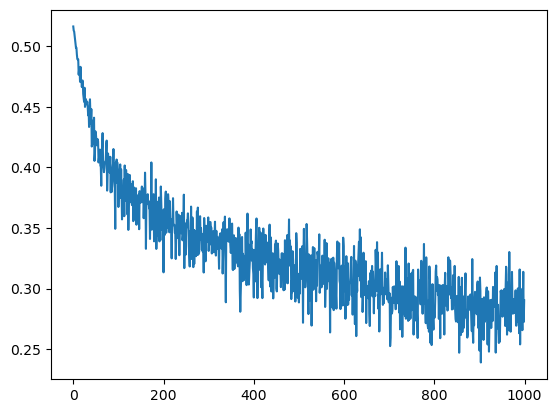

In [146]:
model.plot_loss()

layer 3 (      Tanh): mean +0.03, std 0.65, saturated: 4.00%
layer 6 (      Tanh): mean -0.05, std 0.66, saturated: 2.00%


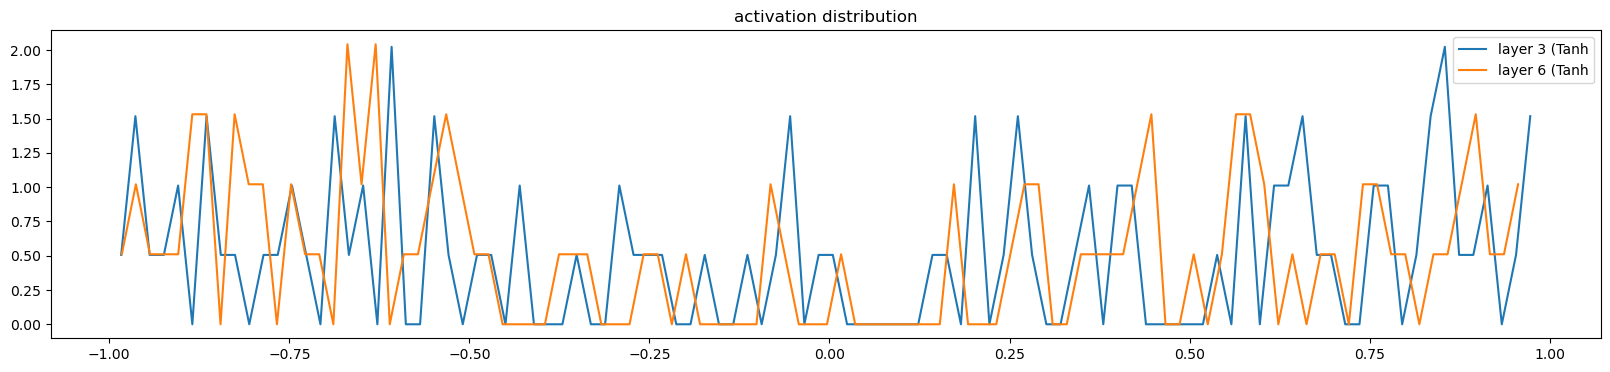

In [163]:
model.plot_activateion_destribution()

In [157]:
def generate():
    context = [0] * context_lenght
    out = []
    while True:
        probs = model.predict(torch.tensor([context]))
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    return ''.join(itochar(i) for i in out)    


In [158]:
for i in range(10):
    print(generate())

apmanfus.
viesusvusaurus.
ycus.
aperpal.
pavaderovaurus.
kjanhocodon.
cornus.
sreon.
naptor.
acavhanosaurus.
